# Import Libraries

In [11]:
import os
import pandas as pd
import kaggle, kagglehub
import dotenv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('bmh')
sns.set_context('notebook')


dotenv.load_dotenv()

os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

kaggle.api.authenticate()


# Get the data

In [12]:
# Download latest version
kaggle.api.dataset_download_files("mohamedharris/supermart-grocery-sales-retail-analytics-dataset", path='data', unzip=True)

# Update the supermarket variable to point to the new path
supermarket = 'data'
print("Path to dataset files:", supermarket)

Dataset URL: https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset
Path to dataset files: data


In [13]:
# Load the dataset
# uncomment the correct one when uploading to kaggle
# df = pd.read_csv('/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df = pd.read_csv(f'{supermarket}/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Examine the data

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [15]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

# Fix a few things

In [16]:
df = df.rename(columns={'Sub Category': 'Sub_Category', 'Order Date': 'Order_Date'})
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df = df.drop(columns=['Order ID', 'State'])

# Visualizations

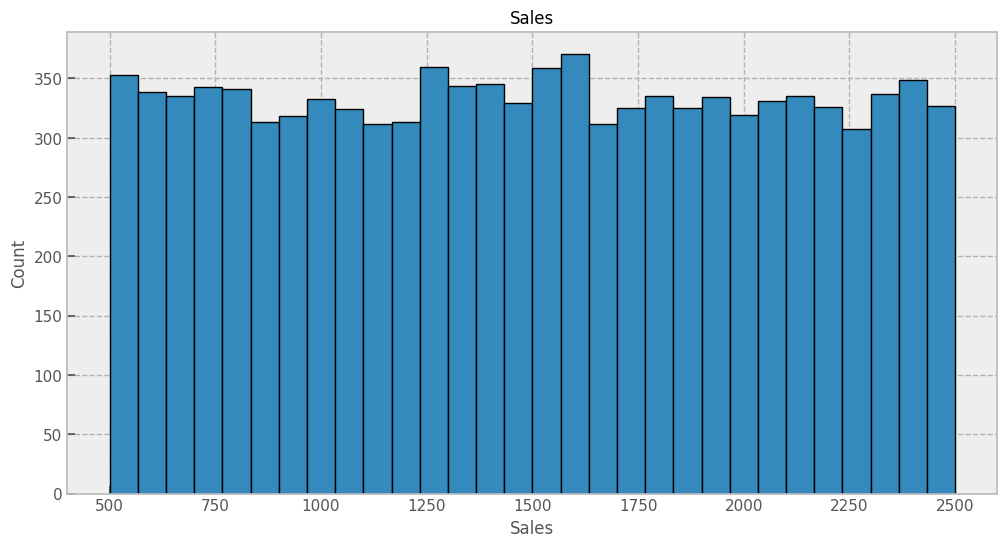

In [ ]:
# Histogram of Sales
plt.hist(df['Sales'], bins=30, edgecolor='black')
plt.title('Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

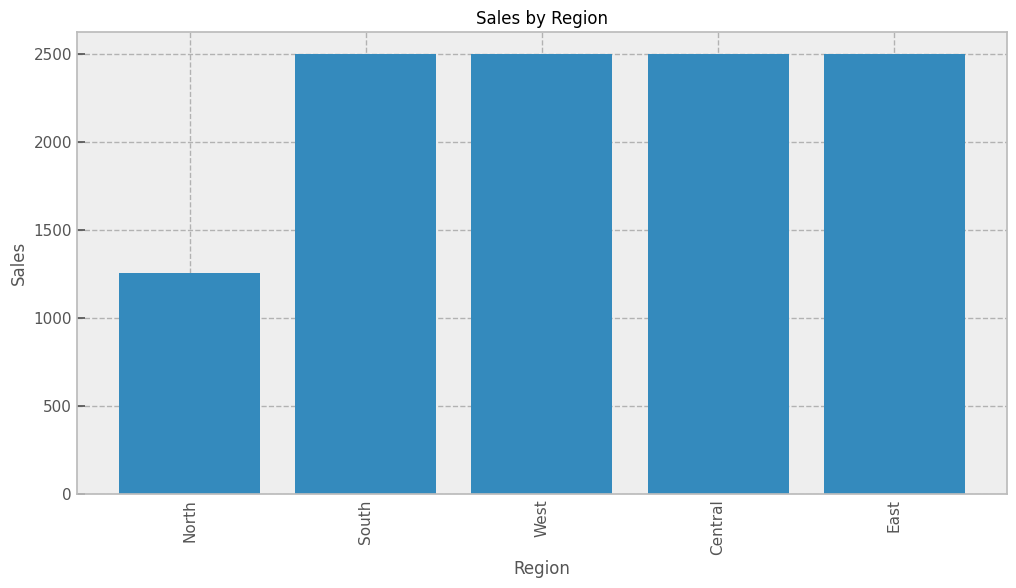

In [ ]:
# Sales by Region
plt.bar(df['Region'], df['Sales'])
plt.xticks(rotation=90)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

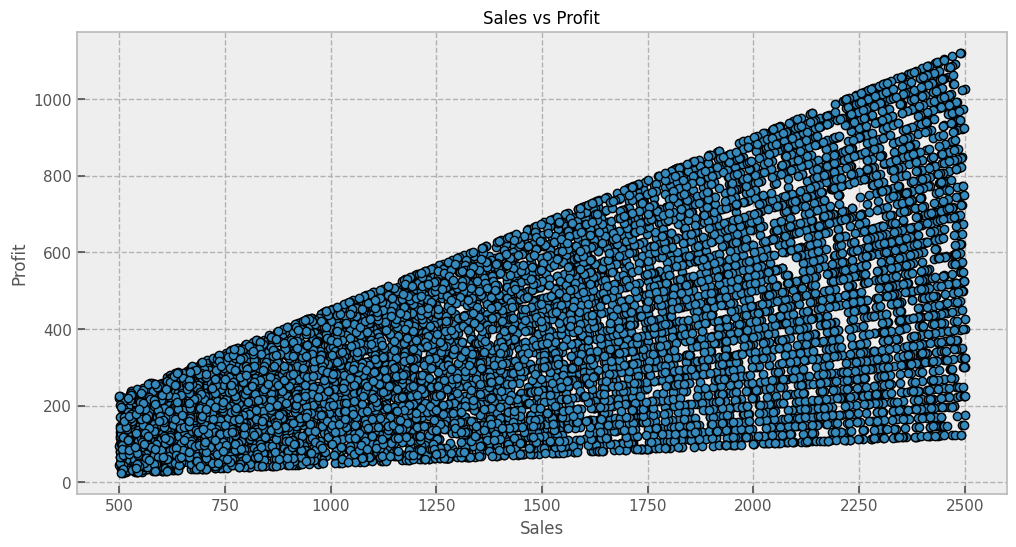

In [ ]:
# Create a scatter plot
plt.scatter(df['Sales'], df['Profit'], edgecolor='black')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()